In [1]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install --upgrade pip
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
pip show nbformat

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols


In [ ]:
#Let's inspect the dataset 

In [5]:
dat = pd.read_excel("merged_data.xlsx")
dat.head() 

,Continent,Region,Country,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors,Year,Unit,GDP Per Capita (US$),Code Value
0,Asia,Western Asia,Turkey,6.89,6.4,7.0,9.0,9.0,4.0,3.0,...,6.5,2.0,4.0,4.0,3.5,3.5,2021,US$,9661.23,TUR
1,Africa,West Africa,Cabo Verde,4.04,3.7,4.5,2.0,2.5,2.5,4.0,...,7.5,5.0,6.0,3.5,6.0,7.0,2021,US$,3293.23,CPV
2,Africa,Southern Africa,South Africa,6.63,6.0,4.5,4.0,8.0,3.5,7.5,...,6.0,6.0,6.0,4.0,5.0,7.0,2021,US$,7055.06,ZAF
3,South America,South America,Colombia,7.66,7.2,7.5,7.0,8.0,6.0,7.0,...,4.5,6.0,5.0,3.5,4.5,6.5,2021,US$,6104.14,COL
4,South America,South America,Peru,6.35,6.2,7.0,6.0,5.5,7.0,5.5,...,5.0,4.5,4.0,3.5,3.0,4.5,2021,US$,6621.65,PER


In [6]:
dat.columns

Index(['Continent', 'Region', 'Country', 'Criminality', 'Criminal markets',
       'Human trafficking', 'Human smuggling', 'Arms trafficking',
       'Flora crimes', 'Fauna crimes', 'Non-renewable resource crimes',
       'Heroin trade', 'Cocaine trade', 'Cannabis trade',
       'Synthetic drug trade', 'Criminal actors', 'Mafia-style groups',
       'Criminal networks', 'State-embedded actors', 'Foreign actors',
       'Resilience', 'Political leadership and governance',
       'Government transparency and accountability',
       'International cooperation', 'National policies and laws',
       'Judicial system and detention', 'Law enforcement',
       'Territorial integrity', 'Anti-money laundering',
       'Economic regulatory capacity', 'Victim and witness support',
       'Prevention', 'Non-state actors', 'Year', 'Unit',
       'GDP Per Capita (US$)', 'Code Value'],
      dtype='object')

In [ ]:
# as a first thing, I will create some plots to visualize the relation between the dependent variable (criminality),
# and the independent variables (GDP Per Capita, Anti-money laundering, Economic regulatory capacity) 
#i am also transsforming gdp into hte log form since the scale is exponentially bigger than the other 

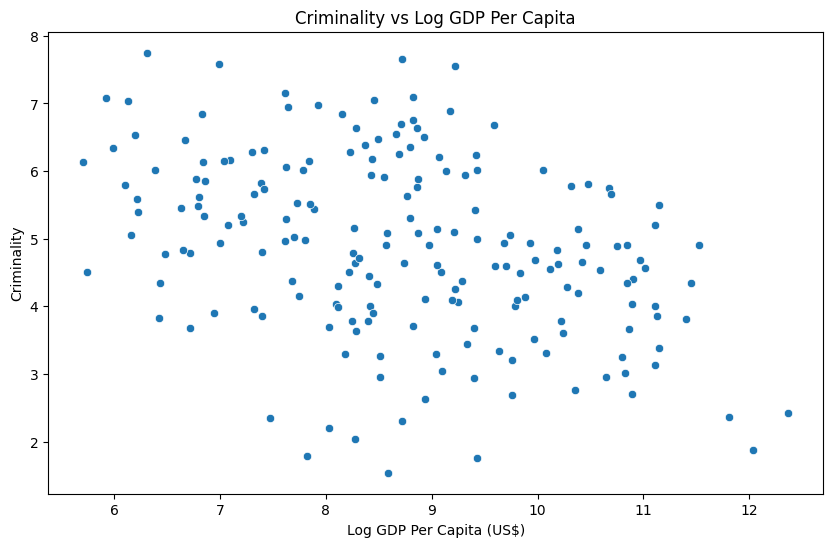

In [7]:
#the first thing, let's check if criminality is related to GDP
dat['log_GDP'] = np.log(dat['GDP Per Capita (US$)'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_GDP', y='Criminality', data=dat)
plt.title('Criminality vs Log GDP Per Capita')
plt.xlabel('Log GDP Per Capita (US$)')
plt.ylabel('Criminality')  
plt.show()

In [ ]:
#Now, I will check law enforcement and criminality 

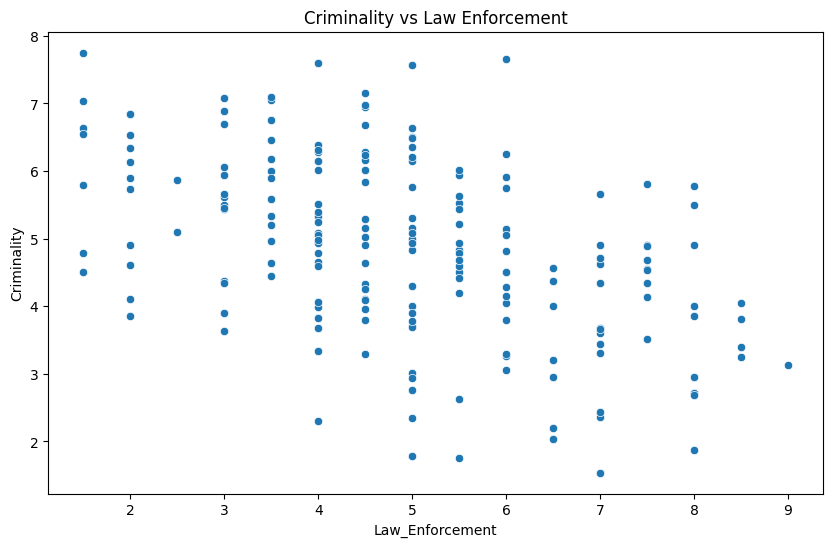

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Law enforcement', y='Criminality', data=dat)
plt.title('Criminality vs Law Enforcement')
plt.xlabel('Law_Enforcement')
plt.ylabel('Criminality')  
plt.show()

<Figure size 1200x1000 with 0 Axes>

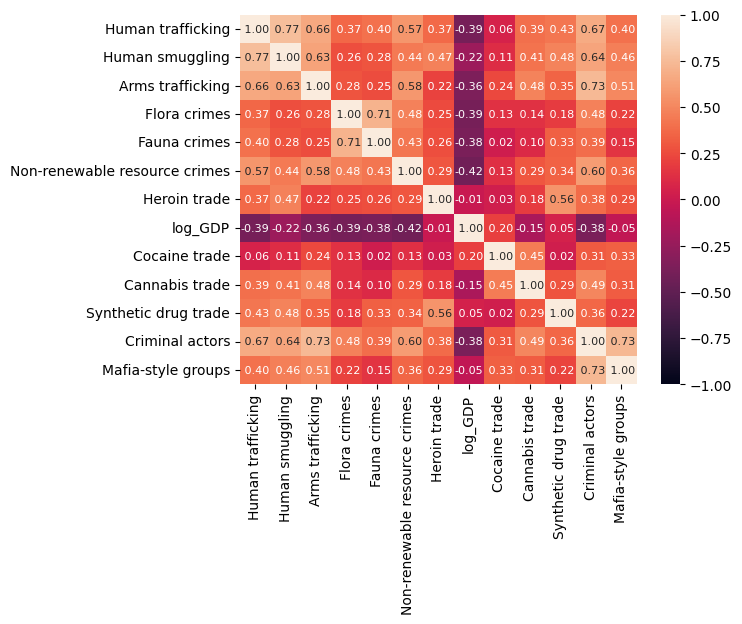

<Figure size 1200x1000 with 0 Axes>

In [9]:
#I want to check if the differnt kinds of criminality are related to GDP
dat_corr_1 = dat[['Human trafficking', 'Human smuggling', 'Arms trafficking', 'Flora crimes',
                'Fauna crimes', 'Non-renewable resource crimes', 'Heroin trade', 'log_GDP', 'Cocaine trade', 'Cannabis trade',
                'Synthetic drug trade', 'Criminal actors', 'Mafia-style groups']]
               
heatmap = sns.heatmap(dat_corr_1.corr(), vmin=-1, vmax=1, annot=True, fmt = ' .2f', annot_kws={"size": 8})
plt.figure(figsize=(12, 10)) 

<Figure size 1200x1000 with 0 Axes>

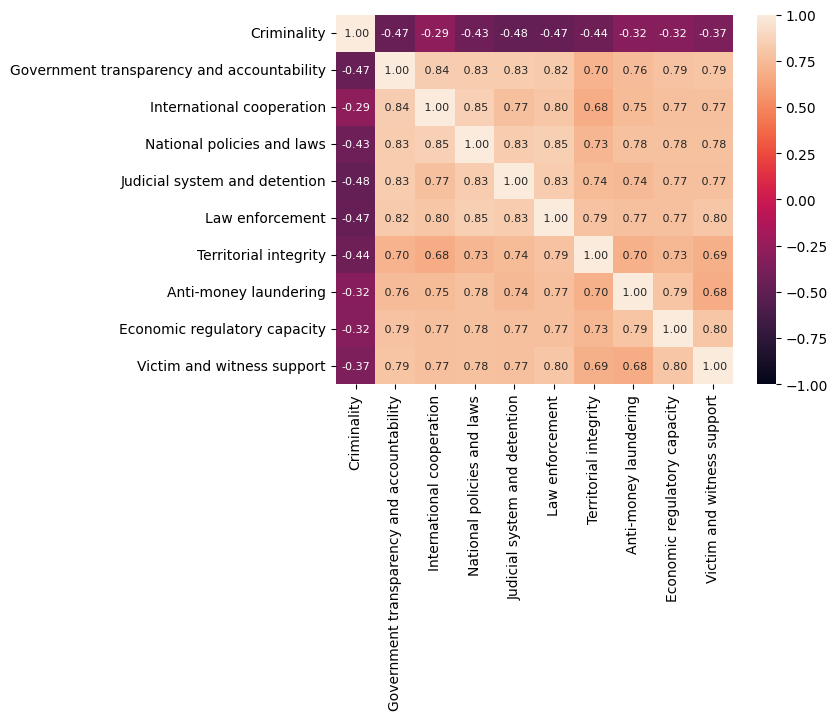

<Figure size 1200x1000 with 0 Axes>

In [10]:
#I want to look if there is a correlation among the criminality index and the different kinds of governemnt features
#criminality index is related to them 
dat_corr_2 = dat[['Criminality',
       'Government transparency and accountability',
       'International cooperation', 'National policies and laws',
       'Judicial system and detention', 'Law enforcement',
       'Territorial integrity', 'Anti-money laundering',
       'Economic regulatory capacity', 'Victim and witness support']]
               
heatmap = sns.heatmap(dat_corr_2.corr(), vmin=-1, vmax=1, annot=True, fmt = ' .2f', annot_kws={"size": 8})
plt.figure(figsize=(12, 10)) 

In [14]:
#I am now going to divide criminality into similar groups
# Human-related Crimes: Human trafficking, Human smuggling
# Drug-related Crimes: Cocaine trade, Heroin trade, Cannabis trade, Synthetic drug trade
#Resource-related Crimes: Flora crimes, Fauna crimes, Non-renewable resource crimes 
#Organized Crime and Mafia: Mafia-style groups 

In [11]:
X = dat[['log_GDP', 'Political leadership and governance',
       'Government transparency and accountability',
       'International cooperation', 'National policies and laws',
       'Judicial system and detention', 'Law enforcement',
       'Economic regulatory capacity', 'Victim and witness support',
       'Prevention']]
y = dat[['Criminality']]
criminality_regr = LinearRegression()
criminality_regr.fit(X,y)

LinearRegression()

In [12]:
y_pred = criminality_regr.predict(X)

Text(0.5, 1.0, 'Actual vs Predicted: Criminality')

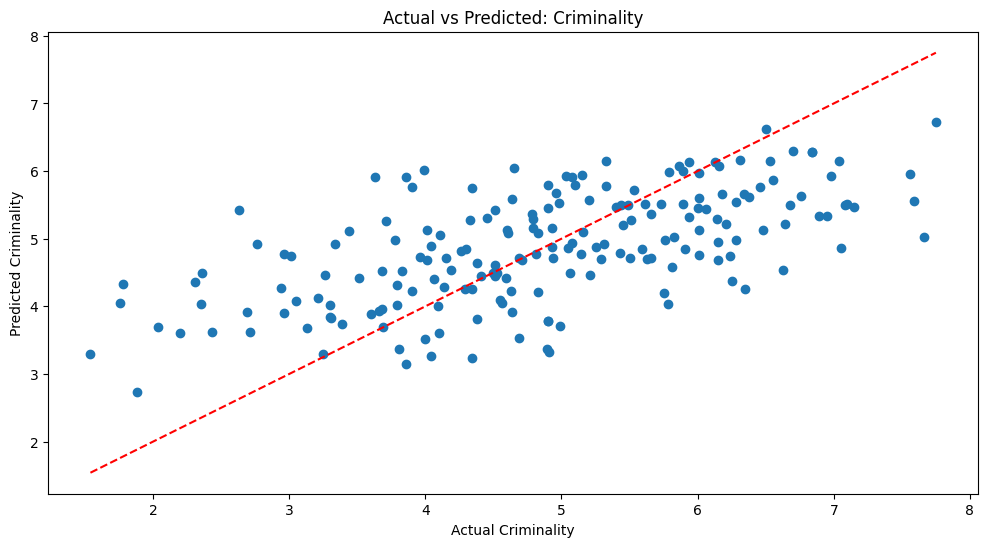

In [13]:
plt.figure(figsize=(12, 6))

plt.scatter(y['Criminality'], y_pred[:, 0])
plt.plot([y['Criminality'].min(), y['Criminality'].max()],
         [y['Criminality'].min(), y['Criminality'].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Criminality')
plt.ylabel('Predicted Criminality')
plt.title('Actual vs Predicted: Criminality')


In [15]:
dat.columns = dat.columns.str.replace(' ', '_')

In [ ]:
#I will run a liear regression in order to try to explain criminality through governemnt's actions and resources allocated

In [16]:
crimianlity_regr = ols("Criminality ~  log_GDP + Political_leadership_and_governance + Government_transparency_and_accountability + International_cooperation + National_policies_and_laws + Judicial_system_and_detention + Law_enforcement + Economic_regulatory_capacity + Victim_and_witness_support + Prevention", data = dat).fit()
print(crimianlity_regr.summary())

                            OLS Regression Results                            
Dep. Variable:            Criminality   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     11.05
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.23e-14
Time:                        02:57:00   Log-Likelihood:                -282.07
No. Observations:                 193   AIC:                             586.1
Df Residuals:                     182   BIC:                             622.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
#R2 0.378

In [ ]:
#if the confidence interval passes through the zero is not statistically significant
#according the pvalue: 
#Significant
#Political_leadership_and_governance, Government_transparency_and_accountability, International_cooperation, Law_enforcement
#Not significant 
#Log_GDP, National_policies_and_laws, Judicial_system_and_detention, Economic_regulatory_capacity, Victim_and_witness_support, Prevention 

In [ ]:
#let's try to run a ridge regression (different related variables, so add an error)

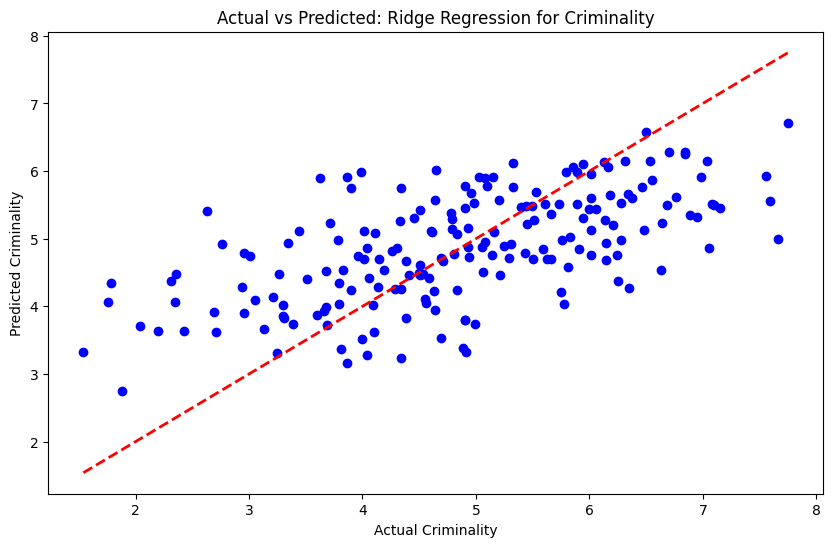

                                      Feature  Ridge Coefficient
3                   International cooperation           0.778610
7                Economic regulatory capacity           0.272079
9                                  Prevention           0.093800
8                  Victim and witness support           0.046079
0                                     log_GDP          -0.129580
4                  National policies and laws          -0.207346
5               Judicial system and detention          -0.255703
6                             Law enforcement          -0.379866
2  Government transparency and accountability          -0.414187
1         Political leadership and governance          -0.452634


In [20]:
#standardize 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create and fit the Ridge regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_scaled, y)
# Predict the target variable using the Ridge model
y_pred_ridge = ridge_reg.predict(X_scaled)
# Visualize the predicted vs actual values for Ridge regression
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_ridge, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Red diagonal line for reference
plt.xlabel('Actual Criminality')
plt.ylabel('Predicted Criminality')
plt.title('Actual vs Predicted: Ridge Regression for Criminality')
plt.show()

# Print Ridge coefficients
ridge_coefficients = pd.DataFrame({'Feature': X.columns, 'Ridge Coefficient': ridge_reg.coef_[0]})
ridge_coefficients = ridge_coefficients.sort_values(by='Ridge Coefficient', ascending=False)
print(ridge_coefficients)

In [ ]:
# coefficients: they are related or not 
# int cooperation increase in it brings an increase in criminality 
# while an increase in political leadership and governance bring criminality down 

In [28]:
#Now i'll run a summary for the ridge regression 
r2 = r2_score(y, y_pred_ridge)
print(f'R-squared: {r2:.4f}')
# the model explains approximately 37.77% of the variance in criminality. 
#A lower R² value (such as this) suggests that there is still significant unexplained variance
#no improvement 

mse = mean_squared_error(y, y_pred_ridge)
print(f'Mean Squared Error: {mse:.4f}')
#A lower value indicates better model performance. 
#In this case, an MSE of 1.089 suggests that there is some room for improvement in the accuracy of the model

# Intercept
print(f'Intercept: {ridge_reg.intercept_}')

R-squared: 0.3777
Mean Squared Error: 1.0890
Intercept: [4.87238342]


In [20]:
#I will run a ridge regression only with the sigificant variables

R-squared: 0.22803716177031896
Mean Squared Error: 1.1957996705134248


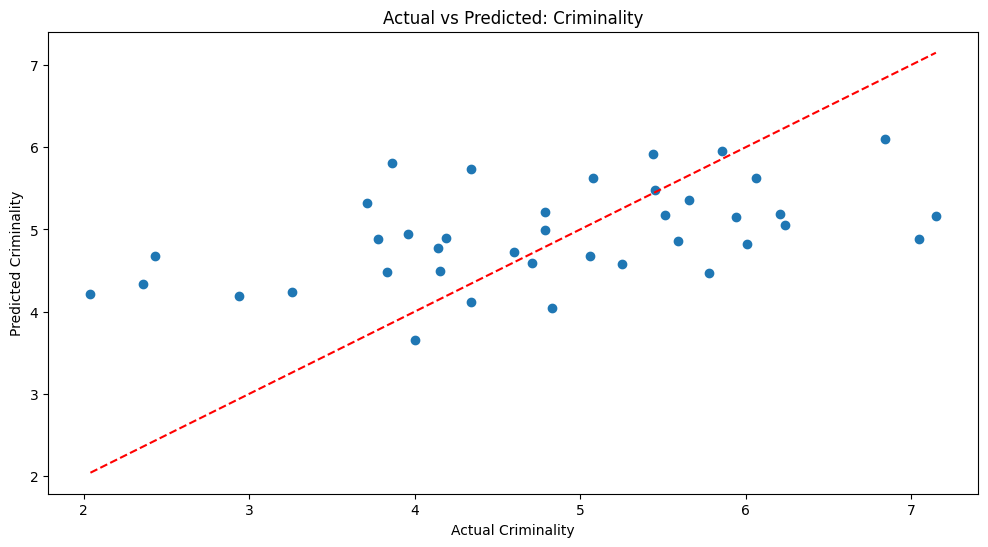

In [31]:
X_selected = X[['Political leadership and governance', 'Government transparency and accountability', 
                'International cooperation', 'Law enforcement']]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Predictions
y_pred = ridge_model.predict(X_test)

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#22.8% of the variance in the target variable (criminality) is explained by the model. Bad. 

# Print R-squared and MSE
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
# This is the average squared difference between the actual and predicted 
# values for criminality. A lower MSE is better, and in this case, an MSE of 1.1958 
# suggests that the model is producing moderately accurate predictions, though there is still room for improvement.

# Plotting the Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Criminality')
plt.ylabel('Predicted Criminality')
plt.title('Actual vs Predicted: Criminality')
plt.show()

#actual vs predicted value does not look good 